In [136]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import glob
import numpy as np

output_dir = os.path.join(os.path.dirname(os.getcwd()), "result/data")

csv_files = glob.glob(os.path.join(output_dir, "results_*.csv"))

dataframes = []
for file in csv_files:
    basename = os.path.basename(file)
    parts = basename.replace(".csv", "").split("_")
    N = int(parts[1][1:])
    tau = float(parts[2][3:])

    df = pd.read_csv(file)
    df["N"] = N
    df["tau"] = tau
    dataframes.append(df)

full_df = pd.concat(dataframes, ignore_index=True)

plot_dir = os.path.join(os.path.dirname(os.getcwd()), "result/plots")
os.makedirs(plot_dir, exist_ok=True)

methods = [
    "local_all",
    "goa",
    "edge_all",
    "dmin",
    "random_1",
]
method_labels = {
    "local_all": "local_all",
    "goa": "GOA",
    "edge_all": "edge_all",
    "dmin": "dmin",
    "random_1": "random",
}
method_colors = {
    "local_all": "#1f77b4",  # 파랑 계열
    "goa": "#ff7f0e",  # 주황 계열
    "edge_all": "#2ca02c",  # 초록 계열
    "dmin": "#9467bd",  # 보라 계열
    "random_1": "#2F0630",
}

In [ ]:
def plot_accuracy_vs_N(df, fixed_tau, save=True, show=True):
    sub = df[df["tau"] == fixed_tau].sort_values(by="N").reset_index(drop=True)

    plt.figure(figsize=(7, 4))
    for method in methods:
        plt.plot(
            sub["N"], sub[f"accuracy_{method}"], marker="o", label=method_labels[method]
        )

    plt.xlabel("N", fontweight="bold")
    plt.ylabel("Accuracy (%)", fontweight="bold")
    plt.grid(True, linestyle="--")
    plt.xticks(range(50, sub["N"].max() + 1, 10))
    plt.yticks(range(44, 58, 2))
    plt.ylim(43.5, 57)
    plt.tight_layout()

    ax = plt.gca()
    for label in ax.get_xticklabels():
        label.set_fontweight("bold")
    for label in ax.get_yticklabels():
        label.set_fontweight("bold")

    legend = plt.legend(framealpha=1)
    for text in legend.get_texts():
        text.set_fontweight("bold")

    if save:
        fname = f"accuracy_vs_N_tau{fixed_tau}.eps"
        plt.savefig(os.path.join(plot_dir, fname), bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()


def plot_accuracy_vs_N_goa(df, save=True, show=True):
    plt.figure(figsize=(7, 4))
    for tau_val in sorted(full_df["tau"].unique()):
        sub = df[df["tau"] == tau_val].sort_values(by="N").reset_index(drop=True)
        plt.plot(sub["N"], sub["accuracy_goa"], marker="o", label=f"τ={tau_val}")

    plt.xlabel("N", fontweight="bold")
    plt.ylabel("Accuracy (%)", fontweight="bold")
    plt.grid(True, linestyle="--")
    plt.xticks(range(50, sub["N"].max() + 1, 10))
    plt.tight_layout()

    ax = plt.gca()
    for label in ax.get_xticklabels():
        label.set_fontweight("bold")
    for label in ax.get_yticklabels():
        label.set_fontweight("bold")

    legend = plt.legend(framealpha=1)
    for text in legend.get_texts():
        text.set_fontweight("bold")

    if save:
        fname = f"accuracy_vs_N_goa.eps"
        plt.savefig(os.path.join(plot_dir, fname), bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()


def plot_delay_total_vs_N_goa(df, save=True, show=True):
    plt.figure(figsize=(7, 4))
    for tau_val in sorted(full_df["tau"].unique()):
        sub = df[df["tau"] == tau_val].sort_values(by="N").reset_index(drop=True)
        plt.plot(
            sub["N"],
            sub["delay_total_goa"] / sub["N"],
            marker="o",
            label=f"τ={tau_val}",
        )

    plt.xlabel("N", fontweight="bold")
    plt.ylabel("Delay (ms)", fontweight="bold")
    plt.legend()
    plt.grid(True, linestyle="--")
    plt.xticks(range(50, sub["N"].max() + 1, 10))
    plt.yticks(range(16, 33, 4))
    plt.ylim(15, 33)
    plt.tight_layout()

    ax = plt.gca()
    for label in ax.get_xticklabels():
        label.set_fontweight("bold")
    for label in ax.get_yticklabels():
        label.set_fontweight("bold")

    legend = plt.legend(framealpha=1)
    for text in legend.get_texts():
        text.set_fontweight("bold")

    if save:
        fname = f"delay_total_vs_N_goa.eps"
        plt.savefig(os.path.join(plot_dir, fname), bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()


def plot_delay_total_vs_N(df, fixed_tau, save=True, show=True):
    sub = df[df["tau"] == fixed_tau].sort_values(by="N").reset_index(drop=True)

    plt.figure(figsize=(7, 4))
    for method in methods:
        plt.plot(
            sub["N"],
            sub[f"delay_total_{method}"] / sub["N"],
            marker="o",
            label=method_labels[method],
        )

    plt.xlabel("N", fontweight="bold")
    plt.ylabel("Delay (ms)", fontweight="bold")
    plt.grid(True, linestyle="--")
    plt.xticks(range(50, sub["N"].max() + 1, 10))
    plt.yticks(range(15, 50, 5))
    plt.ylim(14, 46)
    plt.tight_layout()

    ax = plt.gca()
    for label in ax.get_xticklabels():
        label.set_fontweight("bold")
    for label in ax.get_yticklabels():
        label.set_fontweight("bold")

    legend = plt.legend(framealpha=1)
    for text in legend.get_texts():
        text.set_fontweight("bold")

    if save:
        fname = f"delay_total_vs_N_tau{fixed_tau}.eps"
        plt.savefig(os.path.join(plot_dir, fname), bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()


def plot_delay_local_vs_N(df, fixed_tau, save=True, show=True):
    sub = df[df["tau"] == fixed_tau].sort_values(by="N").reset_index(drop=True)

    plt.figure()
    for method in methods:
        plt.plot(
            sub["N"], sub[f"delay_local_{method}"] / sub["N"], marker="o", label=method
        )

    plt.xlabel("N")
    plt.ylabel("Delay (ms)")
    plt.title(f"Delay_local vs N (tau={fixed_tau})")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.xticks(range(50, sub["N"].max() + 1, 10))
    plt.tight_layout()

    if save:
        fname = f"delay_local_vs_N_tau{fixed_tau}.png"
        plt.savefig(os.path.join(plot_dir, fname), bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()


def plot_t_comm_vs_N(df, fixed_tau, save=True, show=True):
    sub = df[df["tau"] == fixed_tau].sort_values(by="N").reset_index(drop=True)

    plt.figure()
    for method in methods:
        plt.plot(sub["N"], sub[f"t_comm_{method}"] / sub["N"], marker="o", label=method)

    plt.xlabel("N")
    plt.ylabel("t_comm (ms)")
    plt.title(f"t_comm vs N (tau={fixed_tau})")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.xticks(range(50, sub["N"].max() + 1, 10))
    plt.tight_layout()

    if save:
        fname = f"t_comm_vs_N_tau{fixed_tau}.png"
        plt.savefig(os.path.join(plot_dir, fname), bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()


def plot_t_comp_vs_N(df, fixed_tau, save=True, show=True):
    sub = df[df["tau"] == fixed_tau].sort_values(by="N").reset_index(drop=True)

    plt.figure()
    for method in methods:
        plt.plot(sub["N"], sub[f"t_comp_{method}"] / sub["N"], marker="o", label=method)

    plt.xlabel("N")
    plt.ylabel("t_comp (ms)")
    plt.title(f"t_comp vs N (tau={fixed_tau})")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.xticks(range(50, sub["N"].max() + 1, 10))
    plt.tight_layout()

    if save:
        fname = f"t_comp_vs_N_tau{fixed_tau}.png"
        plt.savefig(os.path.join(plot_dir, fname), bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()


def plot_t_proc_vs_N(df, fixed_tau, save=True, show=True):
    sub = df[df["tau"] == fixed_tau].sort_values(by="N").reset_index(drop=True)

    plt.figure(figsize=(7, 3.5))
    plt.plot(sub["N"], sub["t_goa"] * 1000, marker="o")

    plt.xlabel("N", fontweight="bold")
    plt.ylabel("t_proc (ms)", fontweight="bold")
    plt.grid(True, linestyle="--")
    plt.xticks(range(50, sub["N"].max() + 1, 10))
    plt.yticks(range(50, 451, 100))
    plt.ylim(40, 460)
    plt.tight_layout()

    ax = plt.gca()
    for label in ax.get_xticklabels():
        label.set_fontweight("bold")
    for label in ax.get_yticklabels():
        label.set_fontweight("bold")

    if save:
        fname = f"t_proc_vs_N_tau{fixed_tau}.eps"
        plt.savefig(os.path.join(plot_dir, fname), bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()

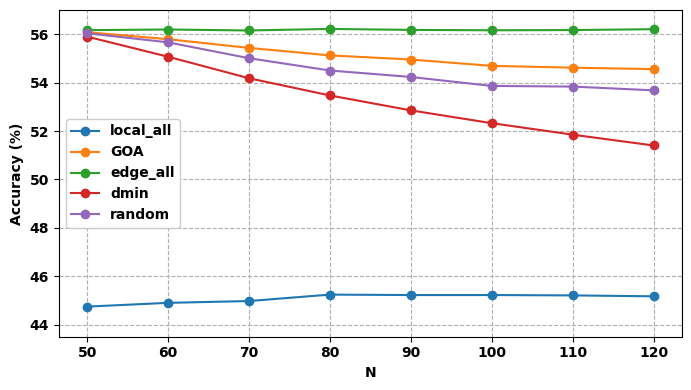

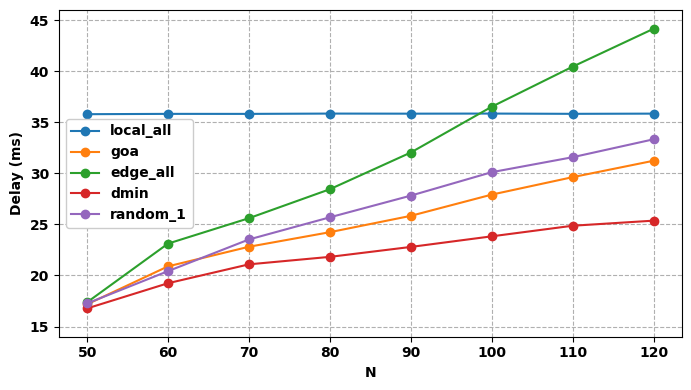

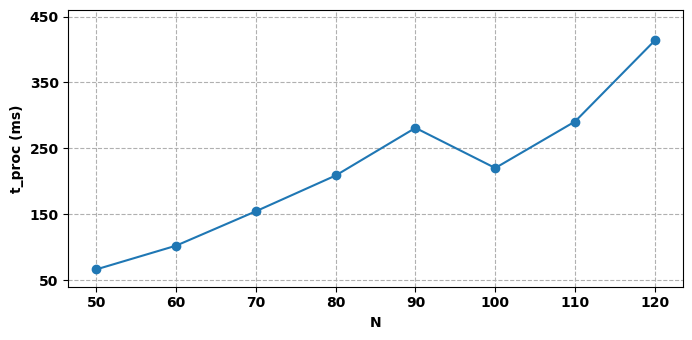

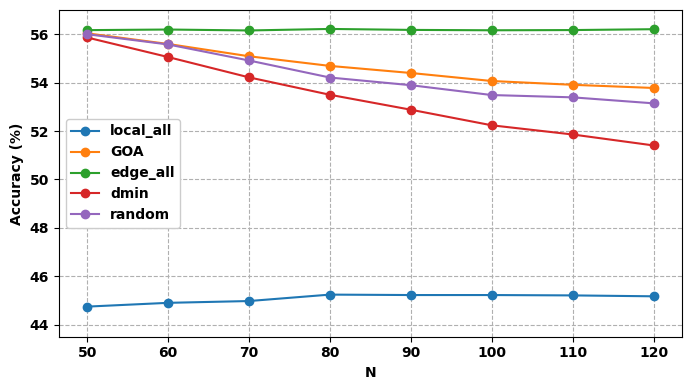

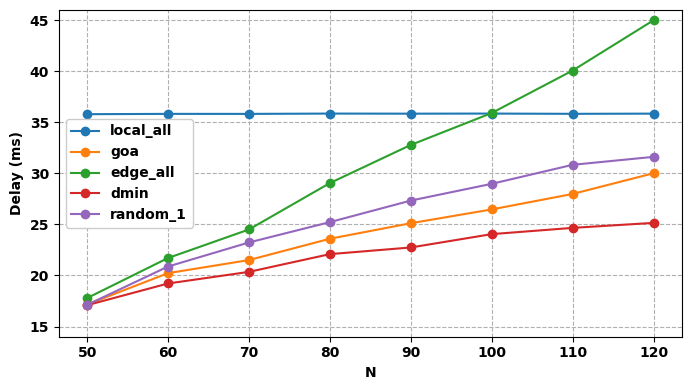

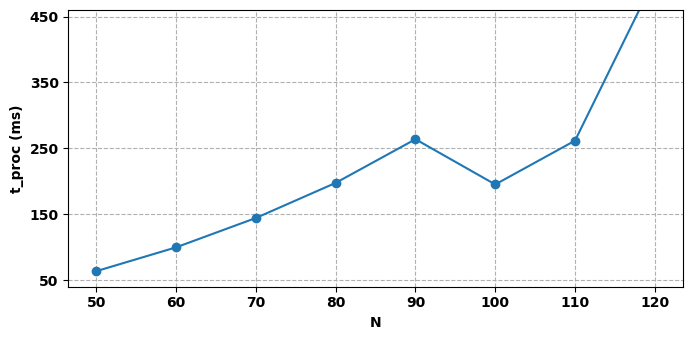

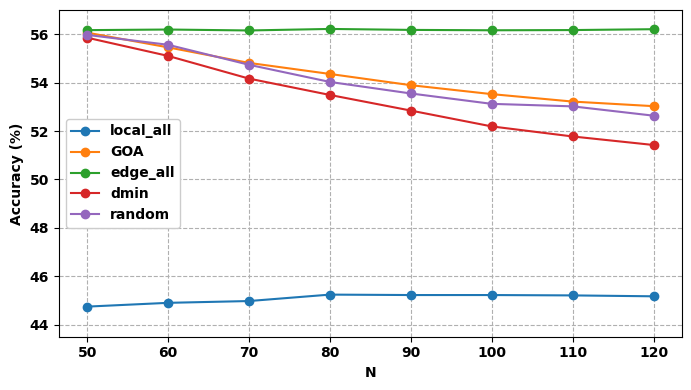

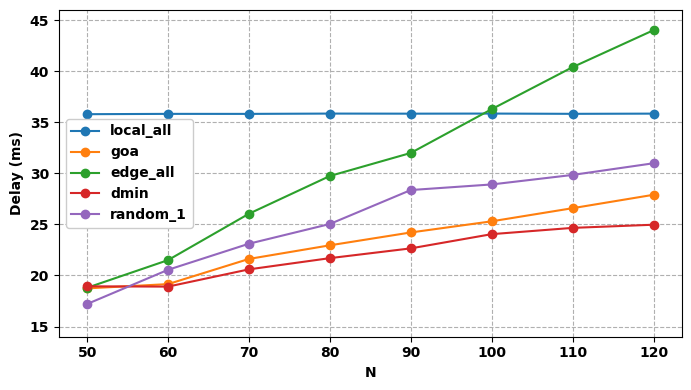

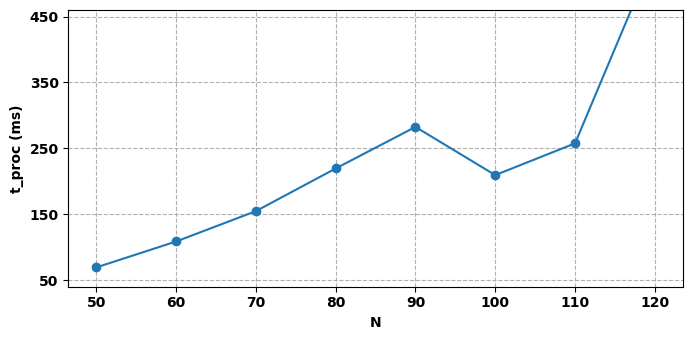

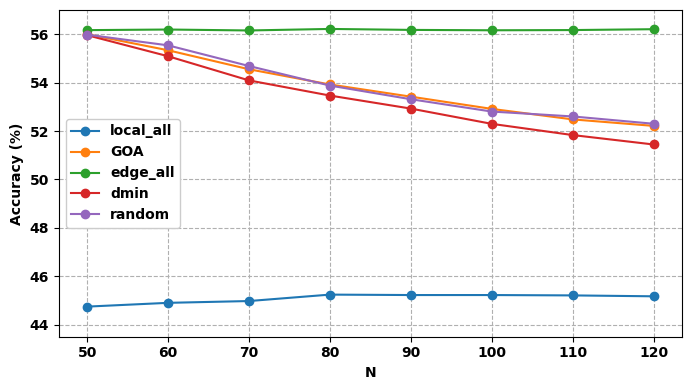

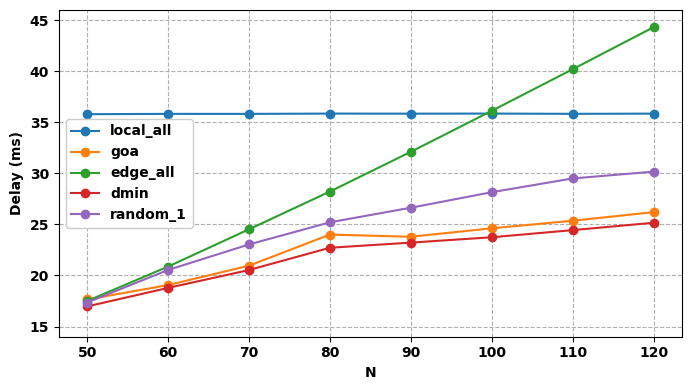

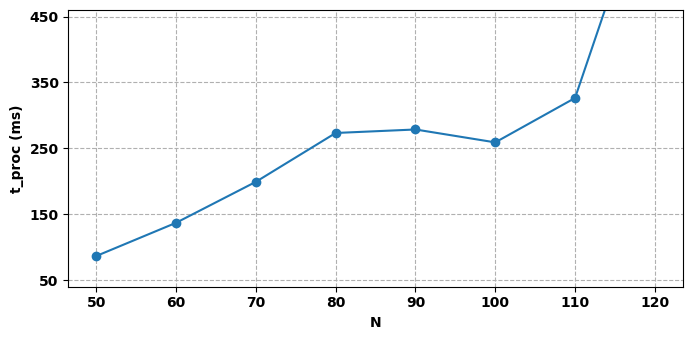

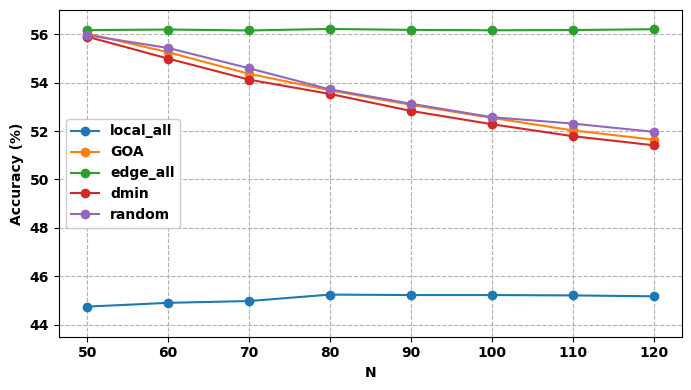

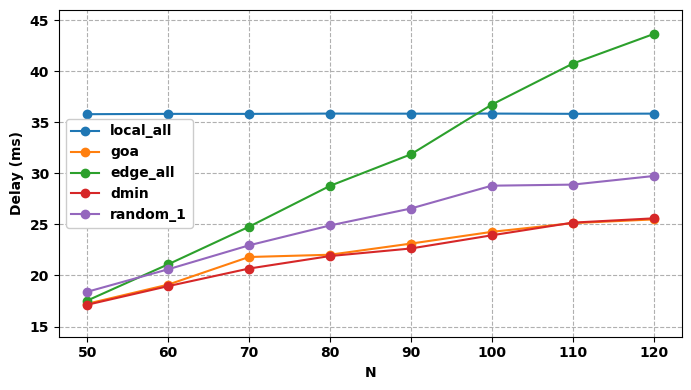

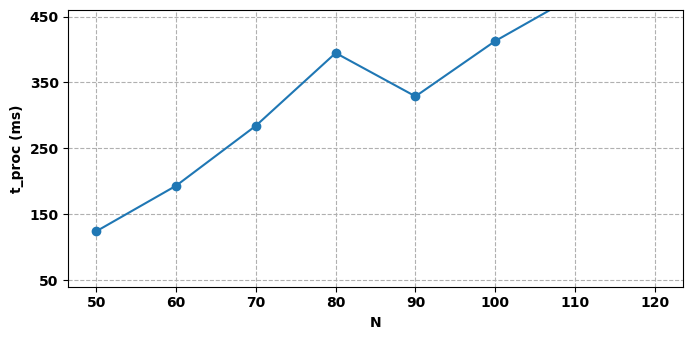

In [138]:
for tau_val in sorted(full_df["tau"].unique()):
    plot_accuracy_vs_N(full_df, fixed_tau=tau_val, save=True)
    plot_delay_total_vs_N(full_df, fixed_tau=tau_val, save=True)
    plot_t_proc_vs_N(full_df, fixed_tau=tau_val, save=True)

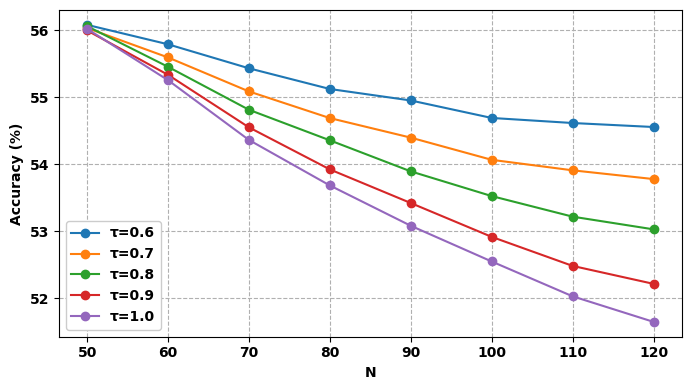

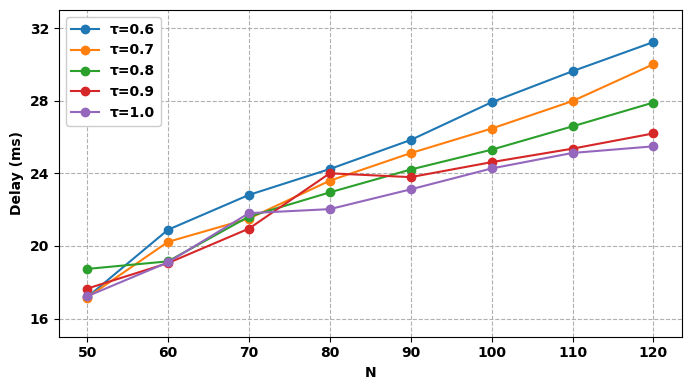

In [133]:
plot_accuracy_vs_N_goa(full_df, save=True)
plot_delay_total_vs_N_goa(full_df, save=True)